In [1]:
import importlib

def install_if_not_installed(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}
        print(f"{package} has been successfully installed.")

# Check and install ucimlrepo if not installed
install_if_not_installed("ucimlrepo")

# Import and use ucimlrepo
import ucimlrepo

ucimlrepo is already installed.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

import warnings     # filter warning messages
warnings.simplefilter(action="ignore")

In [3]:
# Load data into DataFrame

spambase = fetch_ucirepo(id=94)

X = pd.DataFrame(spambase.data.features)
y = pd.DataFrame(spambase.data.targets)

y.value_counts()

Class
0        2788
1        1813
Name: count, dtype: int64

In [4]:
# Display first few rows
df = pd.concat([X, y], axis=1)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load the SPAMBASE dataset
X, y = fetch_openml(name='spambase', return_X_y=True, as_frame=True)

# Convert labels to integers
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Define a list of number of trees
n_trees = [2, 5, 10, 50, 100, 500]

# Train Random Forest classifiers with different number of trees
for n in n_trees:
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=1234)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    train_predictions = rf_classifier.predict(X_train)
    test_predictions = rf_classifier.predict(X_test)

    # Compute evaluation metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_f1 = f1_score(y_train, train_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    train_auc = roc_auc_score(y_train, train_predictions)
    test_auc = roc_auc_score(y_test, test_predictions)

    # Print results
    print(f"Number of trees: {n}")
    print("Training set:")
    print(f"Accuracy: {train_accuracy:.5f}, F1-score: {train_f1:.5f}, AUC: {train_auc:.5f}")
    print("Testing set:")
    print(f"Accuracy: {test_accuracy:.5f}, F1-score: {test_f1:.5f}, AUC: {test_auc:.5f}")
    print()

Number of trees: 2
Training set:
Accuracy: 0.96348, F1-score: 0.95169, AUC: 0.95448
Testing set:
Accuracy: 0.90096, F1-score: 0.86364, AUC: 0.88288

Number of trees: 5
Training set:
Accuracy: 0.99536, F1-score: 0.99411, AUC: 0.99476
Testing set:
Accuracy: 0.92876, F1-score: 0.90828, AUC: 0.92336

Number of trees: 10
Training set:
Accuracy: 0.99710, F1-score: 0.99631, AUC: 0.99633
Testing set:
Accuracy: 0.93918, F1-score: 0.92135, AUC: 0.93351

Number of trees: 50
Training set:
Accuracy: 1.00000, F1-score: 1.00000, AUC: 1.00000
Testing set:
Accuracy: 0.94526, F1-score: 0.92929, AUC: 0.94008

Number of trees: 100
Training set:
Accuracy: 1.00000, F1-score: 1.00000, AUC: 1.00000
Testing set:
Accuracy: 0.95048, F1-score: 0.93603, AUC: 0.94555

Number of trees: 500
Training set:
Accuracy: 1.00000, F1-score: 1.00000, AUC: 1.00000
Testing set:
Accuracy: 0.94787, F1-score: 0.93274, AUC: 0.94301



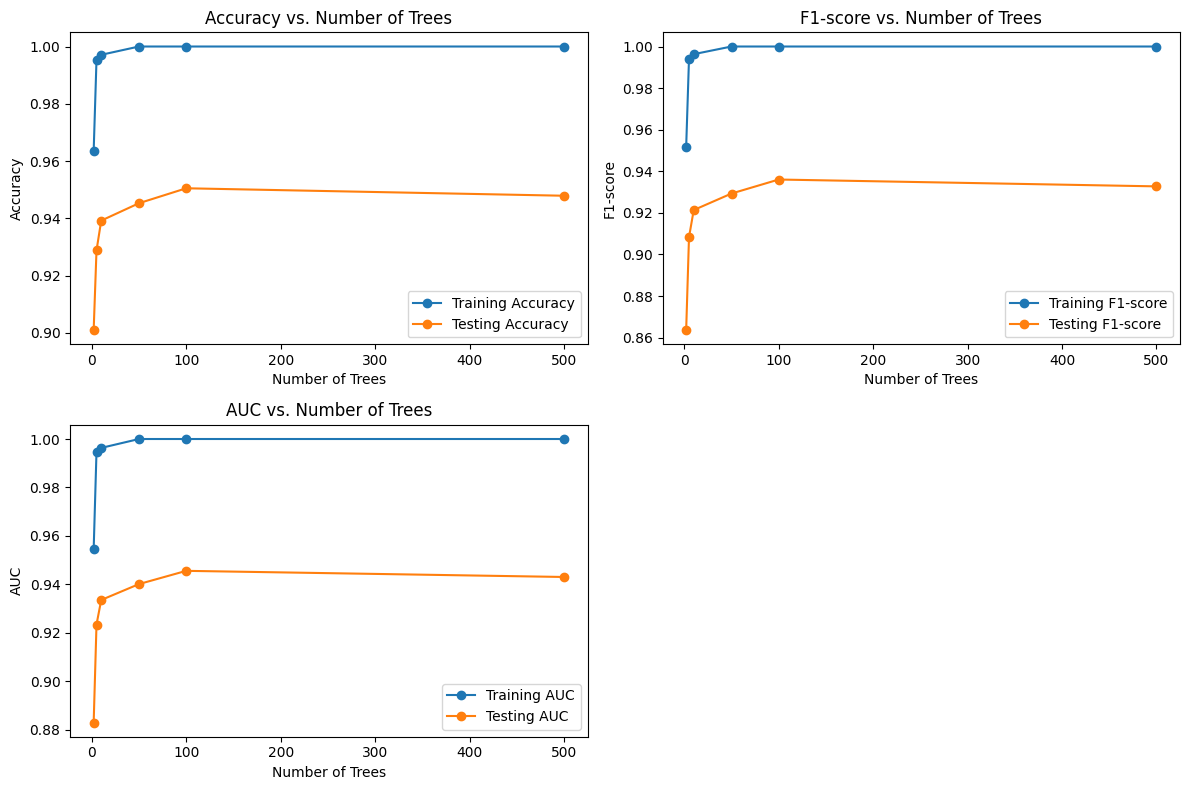

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store metric values
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []
train_auc_scores = []
test_auc_scores = []

# Define a list of number of trees
n_trees = [2, 5, 10, 50, 100, 500]

# Train Random Forest classifiers with different number of trees
for n in n_trees:
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=1234)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    train_predictions = rf_classifier.predict(X_train)
    test_predictions = rf_classifier.predict(X_test)

    # Compute evaluation metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_f1 = f1_score(y_train, train_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    train_auc = roc_auc_score(y_train, train_predictions)
    test_auc = roc_auc_score(y_test, test_predictions)

    # Append metric values to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    train_auc_scores.append(train_auc)
    test_auc_scores.append(test_auc)

# Plotting
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(n_trees, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(n_trees, test_accuracies, marker='o', label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.legend()

# F1-score plot
plt.subplot(2, 2, 2)
plt.plot(n_trees, train_f1_scores, marker='o', label='Training F1-score')
plt.plot(n_trees, test_f1_scores, marker='o', label='Testing F1-score')
plt.xlabel('Number of Trees')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Trees')
plt.legend()

# AUC plot
plt.subplot(2, 2, 3)
plt.plot(n_trees, train_auc_scores, marker='o', label='Training AUC')
plt.plot(n_trees, test_auc_scores, marker='o', label='Testing AUC')
plt.xlabel('Number of Trees')
plt.ylabel('AUC')
plt.title('AUC vs. Number of Trees')
plt.legend()

plt.tight_layout()
plt.show()

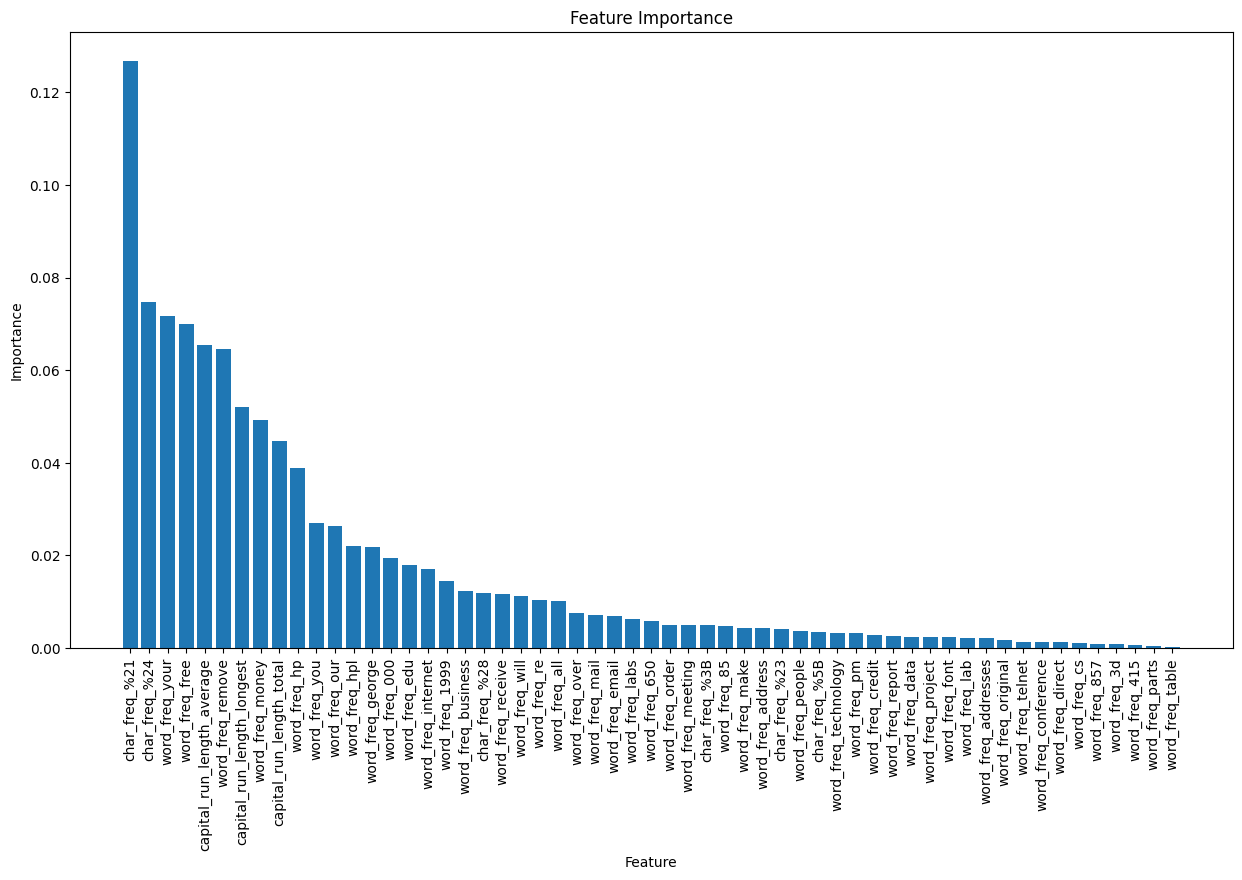

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest classifier with a chosen number of trees
n_trees = 100
rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=1234)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(15, 8))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()